<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/p1/import_files_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"parul28chutani","key":"04dd216dcd0217e43604fab27749a506"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c pubg-finish-placement-prediction



test_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_V2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
file_name = "train_V2.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall();
  print("DONE BABES")

DONE BABES


In [10]:
import pandas as pd
df = pd.read_csv('train_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [0]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


In [0]:
# split the training and testing data into X (image) and Y (label) arrays

#train_df = pd.read_csv(r'data\fashion-mnist_train.csv')
#test_df = pd.read_csv(r'data\fashion-mnist_test.csv')


#train_data = np.array(train_df, dtype='float32')
#test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

FileNotFoundError: ignored

In [0]:
from __future__ import absolute_import, division, print_function
import os

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

#Download MNIST-Fashion data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Normalize data and reshape images 
train_images = train_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))

test_images = test_images / 255.0

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(train_images.shape)

#Create structure with Keras Sequential API
model = keras.Sequential([

    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(input_shape=(28, 28, 1),
                        filters=32,
                        kernel_size=4,
                        padding="same",
                        activation=tf.nn.relu),

    keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),

    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(filters=64,
                        kernel_size=[4, 4],
                        padding="same",
                        activation=tf.nn.relu),

    keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),


    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128,
                       activation=keras.activations.relu,
                       kernel_initializer='he_uniform',
                       bias_initializer='he_uniform'),
    keras.layers.Dense(10, activation=keras.activations.softmax)

])

print(model.summary())

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    # Interrupt training if `val_acc` stops improving for over 5 epochs
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_acc', mode='max'),
    # Write TensorBoard logs to `./logs` directory
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


#Separete data on validation and training samples
val_images = train_images[:15000]
val_labels = train_labels[:15000]

partial_train_images = train_images[15000:]
partical_train_labels = train_labels[15000:]

file_name = str(__file__)[:-3]
weights_file = os.path.join('data', 'weights', file_name)
print(weights_file)

#Train model if file with weights not exist, otherwise load them and run model on test data
if not os.path.exists(weights_file):

    open(os.path.abspath(weights_file), 'w').close()

    history = model.fit(partial_train_images, partical_train_labels, epochs=30,
                        batch_size=64, validation_data=(val_images, val_labels), verbose=1,
                        callbacks=callbacks)

    model.save_weights(str(weights_file))
else:
    model.load_weights(str(weights_file))

results = model.evaluate(test_images, test_labels)
print(results)

#Get predictions on test data
predictions = model.predict(test_images)
print(predictions.shape)

predictions1D = np.zeros(10000,dtype=np.int16)

#Reshape predictions maxtrix from [N, 10] to [N, 1], where 10 is number of classes
for row_i in range(len(predictions)):
    predictions1D[row_i] = np.argmax(predictions[row_i])


print(predictions1D)
conf_matrix = np.zeros((10,10),dtype=np.int16)

#Create confusion matrix
for i in range(len(predictions1D)):

    p_class = predictions1D[i]
    t_class = test_labels[i]
    conf_matrix[t_class][p_class] = conf_matrix[t_class][p_class] + 1
        
#Configure plot for more information visualization
      
import itertools

thresh = conf_matrix.max() / 2.0
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, "{:,}".format(conf_matrix[i, j]),
            horizontalalignment="center",
            color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

2.2.0-rc2
4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
______________________________

NameError: ignored

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet()#.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
       # images = images.to(device)
       # labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
       # images = images.to(device)
       # labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





RuntimeError: ignored

Files already downloaded and verified
Files already downloaded and verified


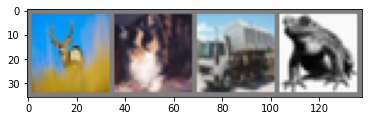

Epoch [1/5], Step [2000/12500], Loss: 2.3056
Epoch [1/5], Step [4000/12500], Loss: 2.3004
Epoch [1/5], Step [6000/12500], Loss: 2.3100
Epoch [1/5], Step [8000/12500], Loss: 2.3035
Epoch [1/5], Step [10000/12500], Loss: 1.8642
Epoch [1/5], Step [12000/12500], Loss: 2.1374
Epoch [2/5], Step [2000/12500], Loss: 1.8223
Epoch [2/5], Step [4000/12500], Loss: 1.8662
Epoch [2/5], Step [6000/12500], Loss: 2.0561
Epoch [2/5], Step [8000/12500], Loss: 1.9295
Epoch [2/5], Step [10000/12500], Loss: 1.7389
Epoch [2/5], Step [12000/12500], Loss: 1.5363
Epoch [3/5], Step [2000/12500], Loss: 2.1993
Epoch [3/5], Step [4000/12500], Loss: 1.9857
Epoch [3/5], Step [6000/12500], Loss: 1.6392
Epoch [3/5], Step [8000/12500], Loss: 1.5054
Epoch [3/5], Step [10000/12500], Loss: 1.7443
Epoch [3/5], Step [12000/12500], Loss: 0.9836
Epoch [4/5], Step [2000/12500], Loss: 1.3581
Epoch [4/5], Step [4000/12500], Loss: 1.3127
Epoch [4/5], Step [6000/12500], Loss: 0.8677
Epoch [4/5], Step [8000/12500], Loss: 1.1126
Epoc

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet()#.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
      #  images = images.to(device)
      #  labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]




    
    for images, labels in test_loader:
       # images = images.to(device)
        #labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')